In [1]:
# !pip install -r requirements.txt

In [21]:
# import sounddevice as sd
# from scipy.io.wavfile import write
# import librosa
# import librosa.display
# import matplotlib.pyplot as plt
# import parselmouth
import numpy as np

In [ ]:
# === Step 1: Record audio ===
fs = 44100  # Sample rate
duration = 5  # Duration in seconds

print("🎤 Recording... Speak or sing now!")
recording = sd.rec(int(duration * fs), samplerate=fs, channels=1)
sd.wait()  # Wait until recording is finished
print("✅ Done recording!")

filename = "my_recording.wav"
write(filename, fs, recording)  # Save as WAV file


🎤 Recording... Speak or sing now!
✅ Done recording!


In [4]:
# === Step 2: Load audio with librosa ===
print("📥 Loading the audio...")
y, sr = librosa.load(filename)

📥 Loading the audio...


In [5]:
import matplotlib
print(matplotlib.__version__)

3.7.1


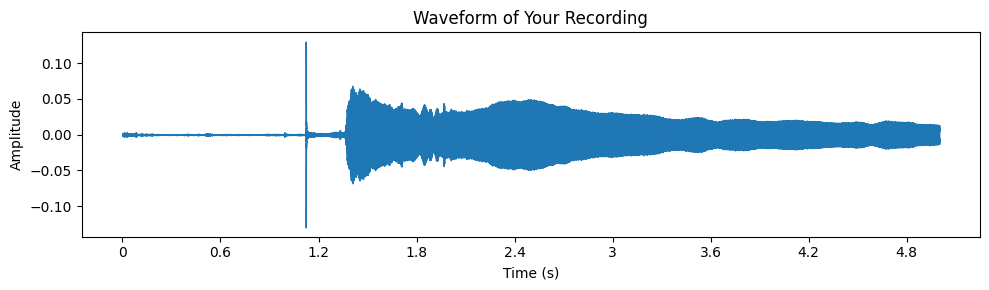

In [6]:
# === Step 3: Display waveform ===
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Your Recording")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

In [19]:


def extract_formants(wav_path, time=0.5):
    snd = parselmouth.Sound(wav_path)
    formant = snd.to_formant_burg()
    
    f1 = formant.get_value_at_time(1, time)  # 1 = F1
    f2 = formant.get_value_at_time(2, time)  # 2 = F2
    
    print(f"At {time:.2f} seconds:")
    print(f"F1: {f1:.2f} Hz")
    print(f"F2: {f2:.2f} Hz")

    return f1, f2

def get_recording(filename, duration=5, fs=44100):
    print("🎤 Recording... Speak or sing now!")
    recording = sd.rec(int(duration * fs), samplerate=fs, channels=1)
    sd.wait()  # Wait until recording is finished
    print("✅ Done recording!")
    write(filename, fs, recording)  # Save as WAV file
    print(f'Saved new file {filename}')


def plot_formants(wav_path):
    snd = parselmouth.Sound(wav_path)
    formant = snd.to_formant_burg()
    duration = snd.get_total_duration()

    times = np.linspace(0, duration, 100)
    f1 = [formant.get_value_at_time(1, t) for t in times]
    f2 = [formant.get_value_at_time(2, t) for t in times]

    plt.plot(times, f1, label="F1")
    plt.plot(times, f2, label="F2")
    plt.title("Formants over Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.legend()
    plt.show()

# plot_formants("my_vowel_a.wav")


# extract_formants("my_vowel_a.wav", time=0.4)

In [13]:
filename = 'jade_vowel_vietnamese_uu.wav'
get_recording(filename)

🎤 Recording... Speak or sing now!
✅ Done recording!
Saved new file jade_vowel_vietnamese_uu.wav


In [14]:
filename = 'jacob_vowel_vietnamese_uu.wav'
get_recording(filename)

🎤 Recording... Speak or sing now!
✅ Done recording!
Saved new file jacob_vowel_vietnamese_uu.wav


In [17]:
# filename = 
wav_path = 'jade_vowel_vietnamese_uu.wav'
f1, f2 = extract_formants(wav_path, time=1)

At 1.00 seconds:
F1: 481.37 Hz
F2: 1876.92 Hz


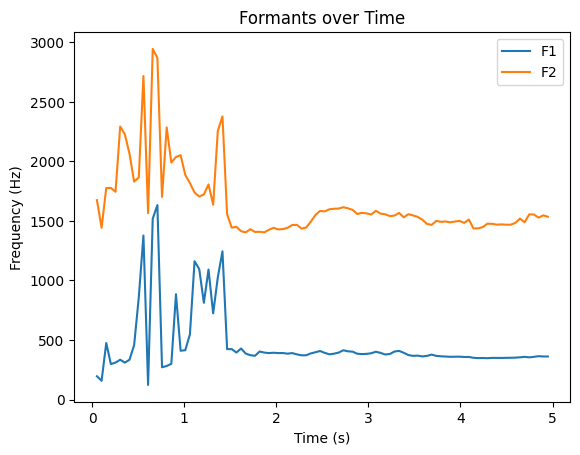

In [22]:
wav_path = 'jade_vowel_vietnamese_uu.wav'
plot_formants(wav_path)

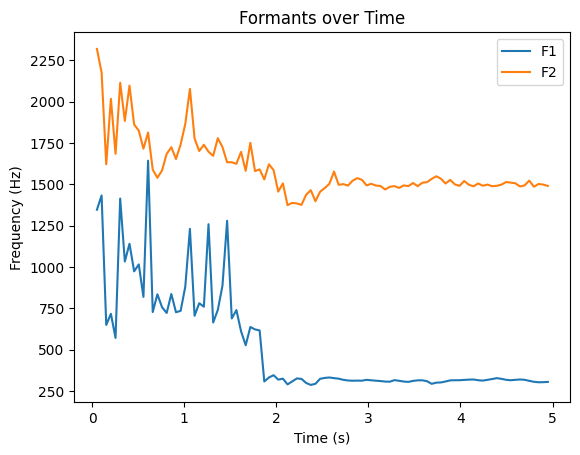

In [23]:
wav_path = 'jacob_vowel_vietnamese_uu.wav'
plot_formants(wav_path)

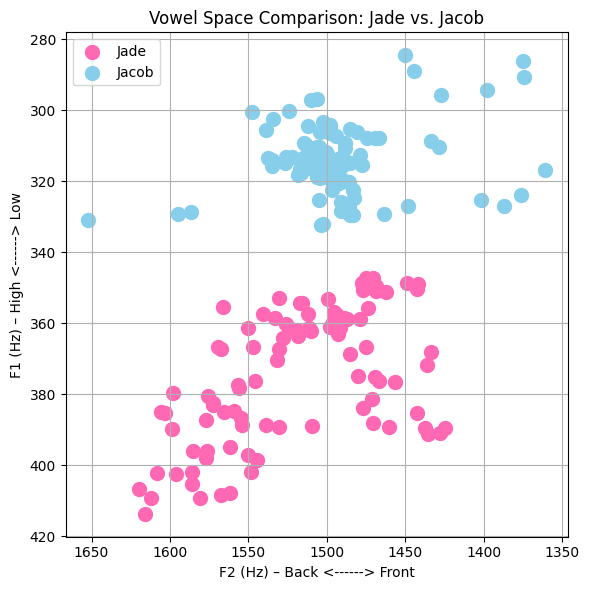

In [29]:
def get_formants_at_center(wav_path):
    snd = parselmouth.Sound(wav_path)
    formant = snd.to_formant_burg()
    duration = snd.get_total_duration()

    times = np.linspace(2, duration, 100)
    f1 = [formant.get_value_at_time(1, t) for t in times]
    f2 = [formant.get_value_at_time(2, t) for t in times]
    return f1, f2

# === Paths to your audio files ===
jade_path = "jade_vowel_vietnamese_uu.wav"
jacob_path = "jacob_vowel_vietnamese_uu.wav"

# === Extract formants ===
jade_f1, jade_f2 = get_formants_at_center(jade_path)
jacob_f1, jacob_f2 = get_formants_at_center(jacob_path)

# === Plot ===
plt.figure(figsize=(6, 6))
plt.scatter(jade_f2, jade_f1, color='hotpink', label='Jade', s=100)
plt.scatter(jacob_f2, jacob_f1, color='skyblue', label='Jacob', s=100)

plt.xlabel("F2 (Hz) – Back <------> Front")
plt.ylabel("F1 (Hz) – High <------> Low")
plt.title("Vowel Space Comparison: Jade vs. Jacob")
plt.gca().invert_yaxis()  # Invert y-axis: High vowels on top (as in linguistics)
plt.gca().invert_xaxis()  # Invert x-axis: Front vowels on right
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()